<a href="https://colab.research.google.com/github/ehsung/PUBH6886/blob/main/PUBH6886_RLabs13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBH 6886: R Lab 13

## Edward Sung

## 12/17/24

In [ ]:
# Install Libraries
install.packages("caret")
install.packages("NeuralNetTools")

In [13]:
# Libraries
library(caret)
library(dplyr)
library(nnet)
library(NeuralNetTools)

# Neural Network Regression Example

In [14]:
# simulate new large data set
set.seed(12345)

X1 <- rnorm(n = 10000, mean = 0, sd = 1)
X2 <- rnorm(n = 10000, mean = 0, sd = 1)
X3 <- rnorm(n = 10000, mean = 0, sd = 1)
X4 <- rbinom(n = 10000, size = 1, prob = 0.5)

Y <- 1 + sin(X1) + -0.7*exp(X2/8) + X1*X3/5 + X4*X2 + rnorm(n = 10000, mean = 0, sd = 1)

sim_reg_data <- data.frame(X1, X2, X3, X4, Y)
sim_reg_data_train <- sim_reg_data[1:1000,]
sim_reg_data_test <- sim_reg_data[1001:10000,]

head(sim_reg_data_train)

,X1,X2,X3,X4,Y
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,0.5855288,0.1612775,0.49501254,0,1.5897386
2,0.7094660,0.5319214,0.47505482,0,-0.1754588
3,-0.1093033,-1.2979034,0.31361642,0,0.1360430
4,-0.4534972,1.2455783,0.37652600,0,1.9845478
5,0.6058875,-0.9916905,0.08255714,0,-0.2794438
6,-1.8179560,-0.3181931,-0.29555393,1,-1.5141793


In [15]:
set.seed(1234)
nn_reg <- nnet(Y ~ X1 + X2 + X3 + X4, linout = TRUE, size = 5, decay = 0, data = sim_reg_data_train)

nn_reg

# weights:  31
initial  value 2218.601286 
iter  10 value 1390.027213
iter  20 value 1234.378010
iter  30 value 1154.683514
iter  40 value 1131.297275
iter  50 value 1119.692721
iter  60 value 1115.143834
iter  70 value 1114.702370
iter  80 value 1113.628507
iter  90 value 1109.690721
iter 100 value 1099.757692
final  value 1099.757692 
stopped after 100 iterations


a 4-5-1 network with 31 weights
inputs: X1 X2 X3 X4 
output(s): Y 
options were - linear output units 

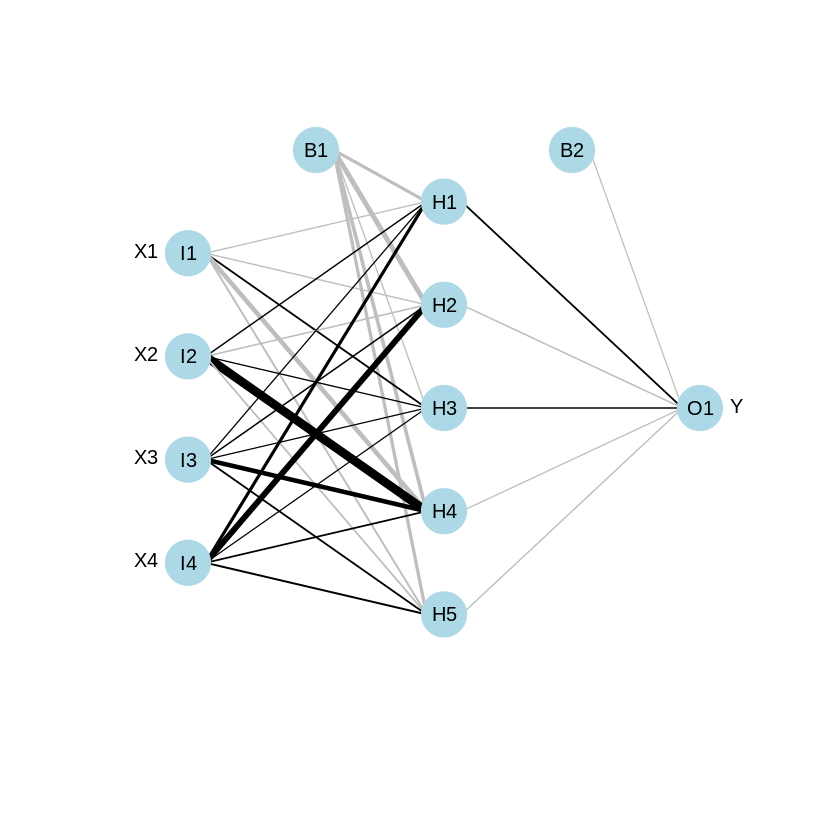

In [16]:
plotnet(nn_reg)

In [23]:
# set up tuning grid
tg_reg <- expand.grid(size = 2:10, decay = 0)

# conduct 10-fold CV to select the number of nodes
set.seed(1234)

nn_reg_train <- train(x = sim_reg_data_train[,1:4], y = sim_reg_data_train$Y,
                      method = "nnet", tuneGrid = tg_reg, trControl = trainControl(method = "cv", number = 10))

nn_reg_train

# weights:  13
initial  value 1897.335010 
final  value 1465.442590 
converged
# weights:  19
initial  value 1945.155618 
final  value 1930.209588 
converged
# weights:  25
initial  value 1975.702052 
final  value 1930.209588 
converged
# weights:  31
initial  value 1975.765802 
final  value 1930.209588 
converged
# weights:  37
initial  value 1982.933832 
final  value 1930.209588 
converged
# weights:  43
initial  value 1889.116690 
iter  10 value 1415.724713
iter  20 value 1408.986358
iter  30 value 1406.955355
iter  40 value 1401.380775
iter  50 value 1399.323267
iter  60 value 1387.201290
iter  70 value 1378.883816
iter  80 value 1375.294807
iter  90 value 1374.402108
iter 100 value 1368.806325
final  value 1368.806325 
stopped after 100 iterations
# weights:  49
initial  value 1844.533832 
iter  10 value 1524.420685
iter  20 value 1476.067966
iter  30 value 1472.302882
iter  40 value 1465.749244
iter  50 value 1421.792637
iter  60 value 1411.295335
iter  70 value 1409.235035
iter 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  61
initial  value 2197.032801 
final  value 2165.265221 
converged


Neural Network 

1000 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 900, 900, 900, 900, 900, 900, ... 
Resampling results across tuning parameters:

  size  RMSE      Rsquared   MAE     
   2    1.311342  0.2333843  1.045401
   3    1.326845  0.2375325  1.057107
   4    1.337763  0.2185470  1.065486
   5    1.315831  0.2284253  1.043681
   6    1.322383  0.2242711  1.051280
   7    1.340135  0.2214019  1.064677
   8    1.302155  0.2226290  1.030062
   9    1.354475  0.2411354  1.078565
  10    1.271550  0.2437003  1.006677

Tuning parameter 'decay' was held constant at a value of 0
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were size = 10 and decay = 0.

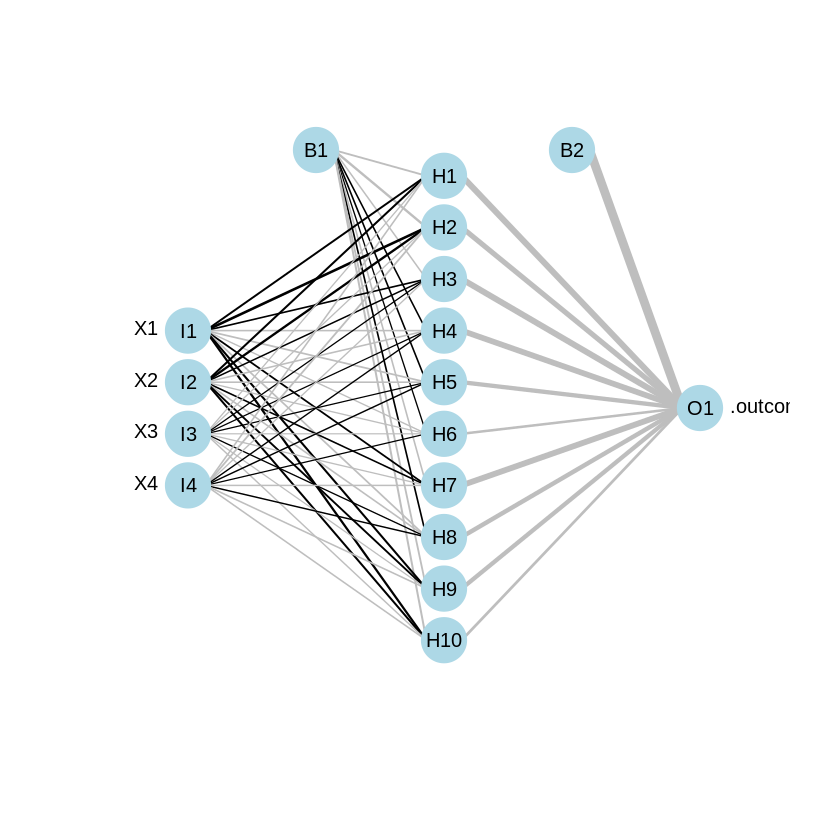

In [18]:
plotnet(nn_reg_train$finalModel)

In [24]:
nn_reg_preds <- predict(nn_reg_train$finalModel, newdata = sim_reg_data_test[,1:4])
# RMSE

sqrt(mean((sim_reg_data_test$Y - nn_reg_preds)^2))

[1] 1.416463

In [25]:
# Rˆ2
cor(sim_reg_data_test$Y, nn_reg_preds)^2

Warning message in cor(sim_reg_data_test$Y, nn_reg_preds):
“the standard deviation is zero”


NA


# Neural Network Classification Example

In [26]:
make_circle <- function(n_samples = 100, shuffle = TRUE, noise = TRUE, factor = 0.8) {
  # function to generate data for classification
  linespace <- seq(0, 2*pi, 2*pi/floor(n_samples/2))
  linespace <- linespace[(1:length(linespace) - 1)]
  outer_circ_x <- cos(linespace)
  outer_circ_y <- sin(linespace)
  inner_circ_x <- outer_circ_x*factor
  inner_circ_y <- outer_circ_y*factor

  X <- cbind(c(outer_circ_x, inner_circ_x), c(outer_circ_y, inner_circ_y))
  Y <- c(rep(0, floor(n_samples/2)), rep(1, floor(n_samples/2)))

  if(noise == TRUE) {
    X <- X + matrix(rnorm(floor(n_samples/2)*4, 0, factor), nrow = floor(n_samples/2)*2)
  }

  df <- as.data.frame(cbind(X, Y))
  colnames(df) <- c("X1", "X2", "Y")

  if(shuffle == TRUE) {
    df <- df[sample.int(nrow(df)),]
    rownames(df) <- 1:(floor(n_samples/2)*2)
  }
  return(df)
}

set.seed(70)
sim_class_data <- make_circle(n_samples = 10000, shuffle = TRUE, noise = TRUE, factor = 0.4)
sim_class_data_train <- sim_class_data[1:1000,]
sim_class_data_test <- sim_class_data[1001:10000,]

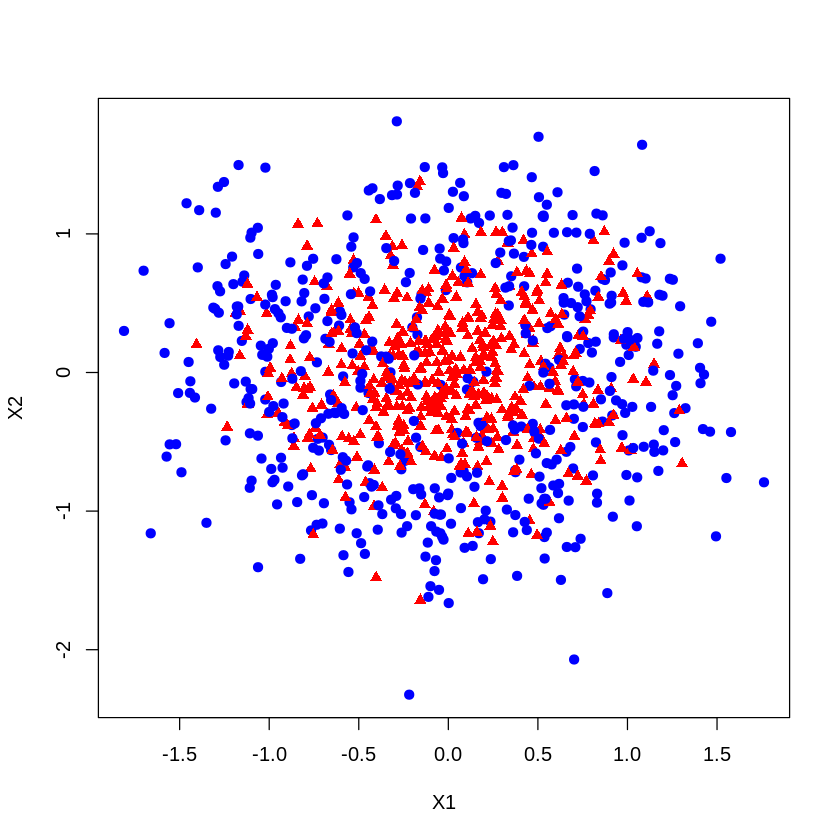

In [28]:
plot(sim_class_data_train[,1:2], col = ifelse(sim_class_data_train$Y == 0, "blue", "red"),
     pch = ifelse(sim_class_data_train$Y == 0, 19, 17))

In [29]:
set.seed(1234)
nn_class <- nnet(Y ~ X1 + X2, linout = FALSE, size = 5, decay = 0, data = sim_class_data_train)

nn_class

# weights:  21
initial  value 253.675265 
iter  10 value 187.647543
iter  20 value 176.077573
iter  30 value 170.128669
iter  40 value 168.744492
iter  50 value 168.714903
iter  60 value 168.675843
iter  70 value 168.586865
iter  80 value 168.528000
iter  90 value 168.512869
iter 100 value 168.285203
final  value 168.285203 
stopped after 100 iterations


a 2-5-1 network with 21 weights
inputs: X1 X2 
output(s): Y 
options were -

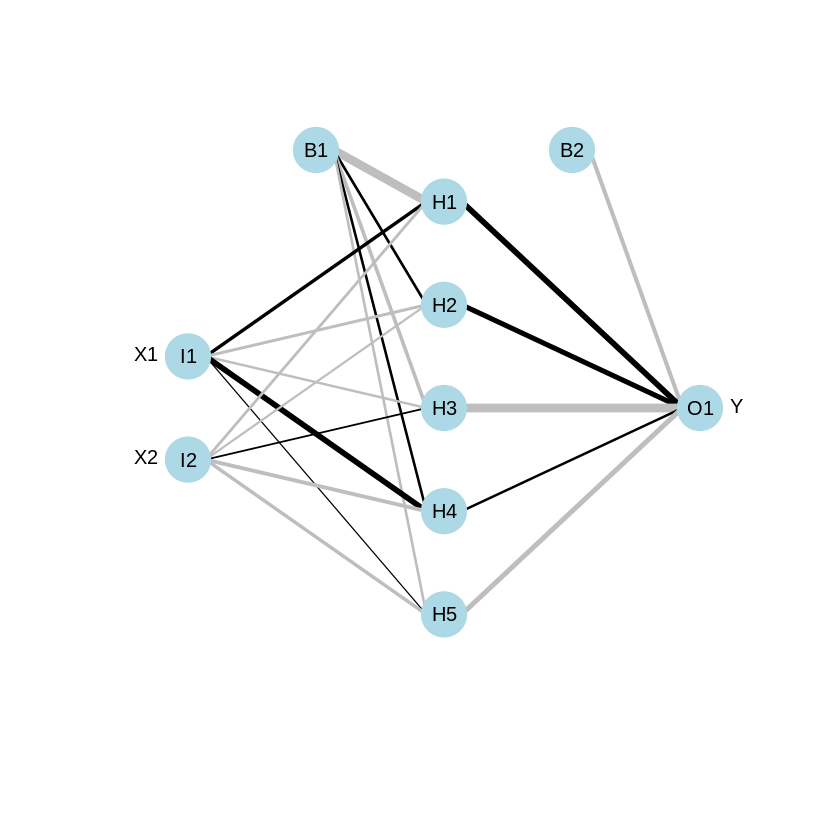

In [30]:
plotnet(nn_class)

In [31]:
# set up tuning grid
tg_class <- expand.grid(size = 2:10, decay = 0)

# conduct 10-fold CV to select the number of nodes
# first convert Y to a factor variable with appropriately named levels
Yfac <- factor(ifelse(sim_class_data_train$Y == 0, "blue", "red"))

set.seed(1234)

nn_class_train <- train(x = sim_class_data_train[,1:2], y = Yfac,
                        method = "nnet", tuneGrid = tg_class,
                        trControl = trainControl(method = "cv", number = 10, classProbs = TRUE))

nn_class_train

# weights:  9
initial  value 643.452518 
iter  10 value 590.693337
iter  20 value 583.864567
iter  30 value 583.609310
iter  40 value 581.997629
iter  50 value 581.880592
final  value 581.865606 
converged
# weights:  13
initial  value 724.267322 
iter  10 value 561.839894
iter  20 value 506.117110
iter  30 value 471.359485
iter  40 value 460.100798
iter  50 value 459.028491
iter  60 value 458.779622
final  value 458.779599 
converged
# weights:  17
initial  value 743.517108 
iter  10 value 567.371761
iter  20 value 497.615023
iter  30 value 471.406155
iter  40 value 462.886434
iter  50 value 459.073298
iter  60 value 454.565190
iter  70 value 453.355850
iter  80 value 453.236583
iter  90 value 453.148516
iter 100 value 453.119995
final  value 453.119995 
stopped after 100 iterations
# weights:  21
initial  value 783.562810 
iter  10 value 555.769805
iter  20 value 478.894315
iter  30 value 459.812581
iter  40 value 457.438590
iter  50 value 454.204184
iter  60 value 453.340130
iter  7

Neural Network 

1000 samples
   2 predictor
   2 classes: 'blue', 'red' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 899, 900, 900, 900, 900, 901, ... 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
   2    0.6530716  0.3092718
   3    0.7209752  0.4420881
   4    0.7370049  0.4738089
   5    0.7369748  0.4738415
   6    0.7369750  0.4739136
   7    0.7379552  0.4759573
   8    0.7419748  0.4837932
   9    0.7369948  0.4739686
  10    0.7350350  0.4699904

Tuning parameter 'decay' was held constant at a value of 0
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 8 and decay = 0.

In [32]:
# compute probability of "red"
nn_class_pred_prob <- predict(nn_class_train$finalModel, newdata = sim_class_data_test[,1:2])
nn_class_pred <- ifelse(nn_class_pred_prob > 0.50, "red", "blue")

# convert Y from test data to a factor variable with appropriately named levels
Yfac_test <- factor(ifelse(sim_class_data_test$Y == 0, "blue", "red"))

# look at confusion matrix
table(pred = nn_class_pred, obs = Yfac_test)

      obs
pred   blue  red
  blue 3409 1293
  red  1084 3214

In [33]:
# compute accuracy
sum(Yfac_test == nn_class_pred) / 9000

[1] 0.7358889